# 2 Deep CNN Architectures

• Why are CNNs so powerful?

• Evolution of CNN architectures

• Developing LeNet from scratch

• Fine-tuning the AlexNet model

• Running a pretrained VGG model

• Exploring GoogLeNet and Inception v3

• Discussing ResNet and DenseNet architectures

• Understanding EfficientNets and the future of CNN architectures

### Their success is attributed to various factors, such as the following:

#### • Weight sharing:
This makes CNNs parameter-efficient; that is, different features are extracted using the same set of weights or parameters. Features are the high-level representations of input data that the model generates with its parameters.

#### • Automatic feature extraction:
Multiple feature extraction stages help a CNN to automatically learn feature representations in a dataset.

#### • Hierarchical learning:
The multi-layered CNN structure helps CNNs to learn low-, mid-, and high-level features.

#### • The ability to explore both spatial and temporal correlations in the data
such as in video-processing tasks.

#### • The use of better activation and loss functions
such as using ReLU to overcome the vanishing gradient problem. 

#### • Parameter optimization
such as using an optimizer based on Adaptive Momentum (Adam) instead of simple stochastic gradient descent.

#### • Regularization: 
Applying dropouts and batch normalization besides L2 regularization.

## architectural innovations:

#### • Spatial exploration-based CNNs:
The idea behind spatial exploration is using different kernel sizes in order to explore different levels of visual features in input data. The following diagram shows a sample architecture for a spatial exploration-based CNN model:

#### • Depth-based CNNs: The depth here refers to the depth of the neural network, 
that is, the number of layers. So, the idea here is to create a CNN model with multiple convolutional layers in order to extract highly complex visual features. The following diagram shows an example of such a model architecture:

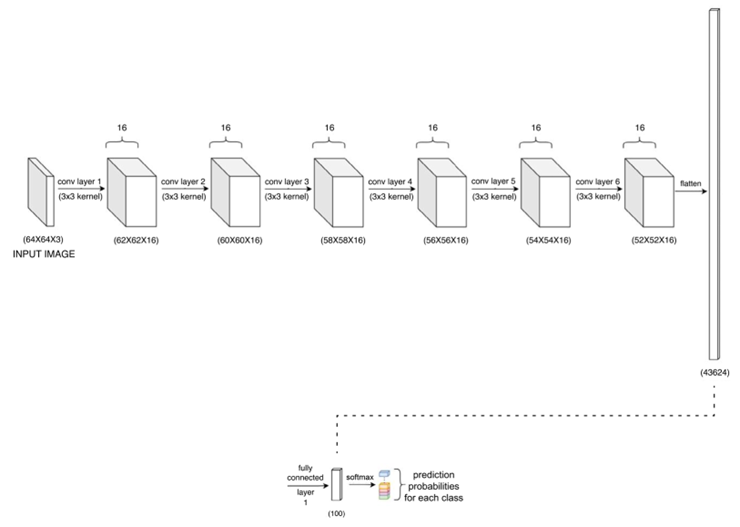

#### • Width-based CNNs: Width refers to the number of channels or feature maps in the data or features extracted from the data. 
So, width-based CNNs are all about increasing the number of feature maps as we go from the input to the output layers, as demonstrated in the following diagram:

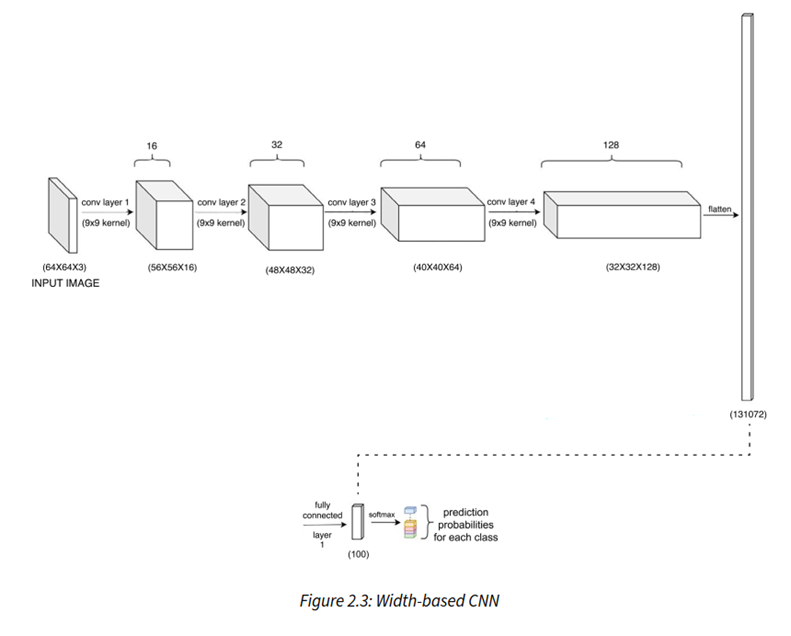

#### • Multi-path-based CNNs: So far, the preceding three types of architectures have had monotonicity in connections between layers; 
that is, direct connections exist only between consecutive layers. Multi-path CNNs brought the idea of making shortcut connections or skip connections between non-consecutive layers. The following diagram shows an example of a multi-path CNN model architecture:

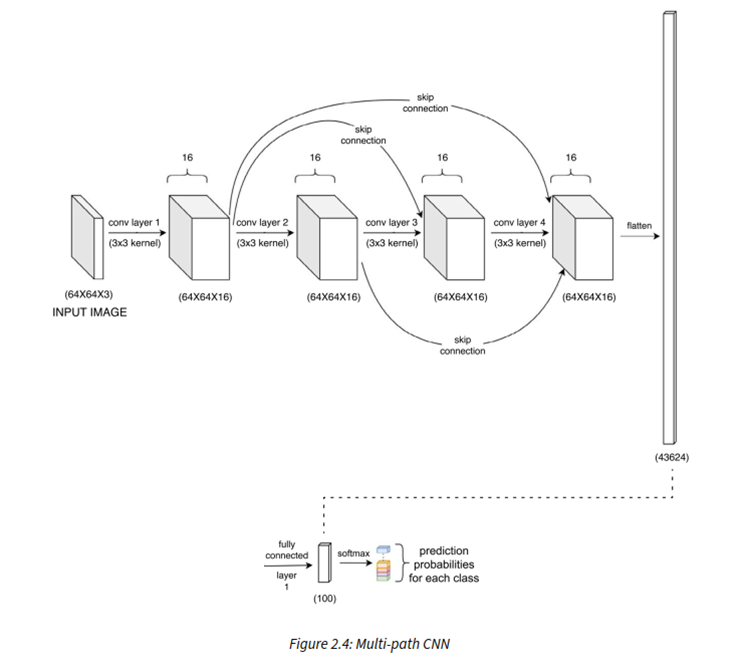

### Having looked at the different architectural setups found in CNN models, we will now look at how CNNs have evolved over the years ever since they were first used.

# Evolution of CNN architectures

CNNs have been in existence since 1989, when the first multi-layered CNN was developed by Yann LeCun. This model could perform the visual cognition task of identifying handwritten digits.

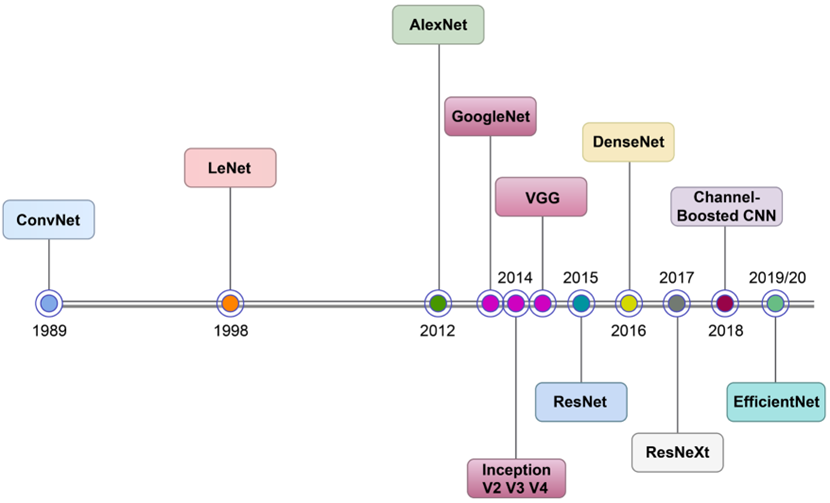

### As we can see, there is a significant gap between the years 1998 and 2012. 
This was for two reasons: 

i. There wasn’t a dataset big and suitable enough to demonstrate the capabilities of CNNs, es-pecially deep CNNs.

ii. The available computing power was limited. 

we will go back to one of the earliest CNN models and take a closer look at the various CNN architectures developed since. We will build these architectures using PyTorch, training some of the models on real-world datasets. We will also explore PyTorch’s pretrained CNN models repository, popularly known as model-zoo. We will learn how to fine-tune these pretrained models as well as running predictions on them.

# Developing LeNet from scratch

one of the earliest CNN models, developed in 1998. 

two convolutional and three fully connected layers. With roughly 60,000 total parameters

As expected from a CNN model, LeNet demonstrated rotation, position, and scale invariance as well as robustness against dis-tortion in images.

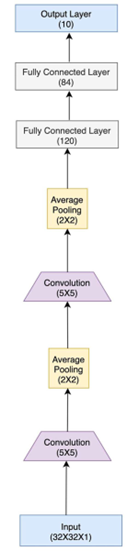

# Using PyTorch to build LeNet

## 1. imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transfroms
torch.use_deterministic_algorithms(True) # for the reproducibility

## 2. Model architecture

In [41]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cn1 = nn.Conv2d(3,6,5)
        self.cn2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.relu(self.cn1(x))
        x = F.max_pool2d(x,(2,2))
        x = F.relu(self.cn2(x))
        x = F.max_pool2d(x, (2,2))
        x = x.view(-1, self.flatten_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def flatten_features(self, x):
        size = x.size()[1:]
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

In [35]:
A = [[[1.0], [4.0]], [[2.0], [1.0]], [[3.0], [5.0]], [[1.0], [4.0]], [[2.0], [1.0]], [[3.0], [5.0]], [[1.0], [4.0]], [[2.0], [1.0]], [[3.0], [5.0]], [[1.0], [4.0]], [[2.0], [1.0]], [[3.0], [5.0]]]

P = torch.tensor(A)

In [36]:
size = P.size()
size

torch.Size([12, 2, 1])

In [38]:
size = P.size()[1:]
size

torch.Size([2, 1])

In [39]:
num_feats = 1
for s in size:
    num_feats *= s

num_feats

2

In [40]:
P.view(-1,num_feats)

tensor([[1., 4.],
        [2., 1.],
        [3., 5.],
        [1., 4.],
        [2., 1.],
        [3., 5.],
        [1., 4.],
        [2., 1.],
        [3., 5.],
        [1., 4.],
        [2., 1.],
        [3., 5.]])

In [42]:
lenet = LeNet()
print(lenet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 3. define the training routine,

In [ ]:
def train(net, trainloader, optim, epoch):
    loss_total = 0.0
    for i, data in enumerate(trainloader,0):
        image , ground_truth = data
        optim.zero_grad()
        op = net(image)
        loss = nn.CrossEntropyLoss()(op, ground_truth)
        loss.backward()
        optim.step()
        loss_total += loss.item()
        if (i+1)%1000 == 0:
            print('[Epoch number : %d, Mini-batches: %5d] loss: %.3f' % (epoch + 1, i + 1, loss_total / 200))
        loss_total = 0.0

## 4. define the test routine

In [47]:
def test(net, testloader):
    success = 0
    counter = 0
    with torch.no_grad():
        for data in testloader:
            im, ground_truth = data
            op = net(im)
            _ , pred = torch.max(op.data, 1)
            counter += ground_truth.size(0)
            success += (pred == ground_truth).sum().item()
    print('LeNet accuracy on 10000 images from test dataset: %d %%' % (100 * success / counter))
    

## 5. Load dataset / CIFAR-10

60,000 32x32 RGB images labeled across 10 classes, with 6,000 images per class. The 60,000 images are split into 50,000 training images and 10,000 test images. 

In [48]:
train_transform = transfroms.Compose([transfroms.RandomHorizontalFlip(),transfroms.RandomCrop(32,4),transfroms.ToTensor(),
                                      transfroms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [49]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)


100%|██████████| 170M/170M [00:17<00:00, 9.53MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


In [50]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 8, shuffle= True)

In [51]:
test_transform = transfroms.Compose([transfroms.ToTensor(), transfroms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [108]:
testset = torchvision.datasets.CIFAR10(root='./data',train= False, download=True, transform=train_transform)

Files already downloaded and verified


In [109]:
testloader = torch.utils.data.DataLoader(testset, batch_size= 10000, shuffle=False)

In [66]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# Order สำคัญ

### The transformations used for training and testing datasets are different because we apply some data augmentation to the training dataset, such as flipping and cropping, which are not applicable to the test dataset

## 6. Investigate how the data looks:

In [67]:
def imageshow(image):
    image = image/2 + 0.5
    npimage = image.numpy() 
    plt.imshow(np.transpose(npimage, (1, 2, 0))) 
    plt.show()

In [68]:
# sample images from training set
dataiter = iter(trainloader)
Images, labels = next(dataiter)

In [74]:
Images[0:4].shape

torch.Size([4, 3, 32, 32])

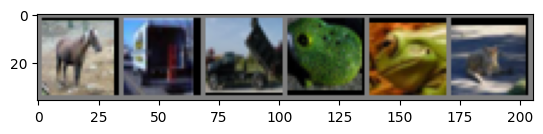

In [71]:
num_images = 6
imageshow(torchvision.utils.make_grid(Images[:num_images]))

In [75]:
print('    '+'  ||  '.join(classes[labels[j]] for j in range(num_images)))

    horse  ||  truck  ||  truck  ||  frog  ||  frog  ||  cat


# Training LeNet

## 1. Define the optimizer and start the training loop

In [76]:
optim = torch.optim.Adam(lenet.parameters(), lr = 0.001)

In [77]:
for epoch in range(50):
    train(lenet, trainloader, optim,epoch)
    print()
    test(lenet, testloader) 
    print()
print('Finished Training')

[Epoch number : 1, Mini-batches:  1000]                   loss: 0.009
[Epoch number : 1, Mini-batches:  2000]                   loss: 0.009
[Epoch number : 1, Mini-batches:  3000]                   loss: 0.007
[Epoch number : 1, Mini-batches:  4000]                   loss: 0.007
[Epoch number : 1, Mini-batches:  5000]                   loss: 0.007
[Epoch number : 1, Mini-batches:  6000]                   loss: 0.007

LeNet accuracy on 10000 images from test dataset: 44 %

[Epoch number : 2, Mini-batches:  1000]                   loss: 0.007
[Epoch number : 2, Mini-batches:  2000]                   loss: 0.006
[Epoch number : 2, Mini-batches:  3000]                   loss: 0.007
[Epoch number : 2, Mini-batches:  4000]                   loss: 0.007
[Epoch number : 2, Mini-batches:  5000]                   loss: 0.005
[Epoch number : 2, Mini-batches:  6000]                   loss: 0.008

LeNet accuracy on 10000 images from test dataset: 48 %

[Epoch number : 3, Mini-batches:  1000]       

KeyboardInterrupt: 

## 2. we can save the model file locally:

In [78]:
model_path = './Model/LeNet.pth'
torch.save(lenet.state_dict(), model_path)

# Testing LeNet

## 1. Loads saved model and running it on test dataset

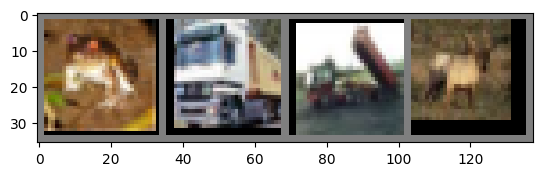

Label:        frog truck truck  deer


In [81]:
d_iter = iter(testloader)
im, ground_truth = next(d_iter)

imageshow(torchvision.utils.make_grid(im[:4]))
print('Label:      ', ' '.join('%5s' % classes[ground_truth[j]] for j in range(4)))

In [ ]:
# Load model 
lenet_cached = LeNet()
lenet_cached.load_state_dict(torch.load(model_path))

op = lenet_cached(im)

_, pred = torch.max(op , 1)

print('Prediction: ', ' '.join('%5s' % classes[pred[j]] 
                               for j in range(4)))

C:\Users\jaroenchart\AppData\Local\Temp\ipykernel_3164\4203875996.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lenet_cached.load_state_dict(torch.load(model_path))


Prediction:    dog truck truck  deer


## 2. check the overall accuracy of the model as the perclass accuracy

In [ ]:
success = 0
counter = 0

with torch.no_grad():
    for data in testloader:

        im , ground_truth = data
        op = lenet_cached(im)
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()
print('Model accuracy on 10000 images from test dataset: %d %%' % (100 * success / counter))

Model accuracy on 10000 images from test dataset: 62 %


In [102]:
ground_truth

tensor([1, 8, 5,  ..., 9, 1, 1])

In [101]:
success

31906

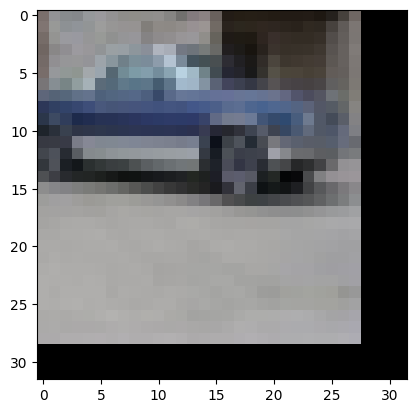

In [91]:
imageshow(im[0])

## 3. For per-class accuracy

In [114]:
class_sucess = list(0 for i in range(10))
class_counter = list(0 for i in range(10))

In [132]:
with torch.no_grad():
    for data in testloader:
        im , ground_truth = data
        op = lenet_cached(im)
        _, pred = torch.max(op, 1)
        c = (pred == ground_truth).squeeze()
        for i in range(10000):
            ground_truth_curr = ground_truth[i]
            class_sucess[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1
for i in range(10):
    print('Model accuracy for class %5s : %2d %%' % (classes[i], 100 * class_sucess[i] / class_counter[i]))

Model accuracy for class plane : 64 %
Model accuracy for class   car : 75 %
Model accuracy for class  bird : 53 %
Model accuracy for class   cat : 43 %
Model accuracy for class  deer : 56 %
Model accuracy for class   dog : 51 %
Model accuracy for class  frog : 69 %
Model accuracy for class horse : 64 %
Model accuracy for class  ship : 81 %
Model accuracy for class truck : 71 %


In [129]:
c.squeeze()
c.shape

torch.Size([10000])

In [130]:
c

tensor([False,  True,  True,  ...,  True,  True,  True])

In [127]:
type(c)

torch.Tensor

# AlexNet (pretrained and finetune)

AlexNet is a successor of LeNet with incremental changes in the architecture, such as 8 layers (5 convolutional and 3 fully connected) instead of 5, and 60 million model parameters instead of 60,000, as well as using MaxPool instead of AvgPool.

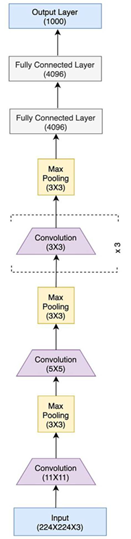

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, number_of_classes):
        super(AlexNet, self).__init__() 
        self.feats = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, 
                      kernel_size=11, stride=4, padding=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            nn.Conv2d(in_channels=64, out_channels=192, 
                      kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            nn.Conv2d(in_channels=192, out_channels=384, 
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, 
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, 
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), 
        )
        self.clf = nn.Linear(in_features=256, out_features=number_of_classes) 
    def forward(self, inp):
        op = self.feats(inp)
        op = op.view(op.size(0), -1) 
        op = self.clf(op)
        return op

Pretrained model 

• AlexNet

• VGG

• ResNet

• SqueezeNet

• DenseNet

• Inception v3 

• GoogLeNet

• ShuffleNet v2 

• MobileNet v2 

• ResNeXt

• Wide ResNet 

• MnasNet

• EfficientNet

we will use a pretrained AlexNet model

## Using PyTorch to fine-tune AlexNet

### 1. imports

In [134]:
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms 
torch.use_deterministic_algorithms(True)

download and transform the dataset. 

image dataset of bees and ants. There are 240 training images and 150 validation images divided equally between the two classes (bees and ants).

Transform the dataset:

In [139]:
ddir = "data\hymenoptera_data"

data_transformers = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                                    transforms.RandomHorizontalFlip(),
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(
                                                    [0.490, 0.449, 0.411], 
                                                    [0.231, 0.221, 0.230])]),
                     'val': transforms.Compose([transforms.Resize(256), 
                                                    transforms.CenterCrop(224), 
                                                    transforms.ToTensor(), 
                                                    transforms.Normalize(
                                                [0.490, 0.449, 0.411], 
                                                [0.231, 0.221, 0.230])])
                                                  }

In [140]:
img_data = {k : datasets.ImageFolder(os.path.join(ddir, k), data_transformers[k]) for k in ['train', 'val']}

In [142]:
dloaders = {k: torch.utils.data.DataLoader(img_data[k], batch_size=8, shuffle=True) for k in ['train', 'val']}

In [143]:
dset_sizes = {x: len(img_data[x]) for x in ['train', 'val']}

In [144]:
classes = img_data['train'].classes

In [148]:
dvc = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [151]:
type(dloaders['train'])

torch.utils.data.dataloader.DataLoader

### 2. Visualize some sample training dataset images:

In [149]:
def imageshow(img, text=None):
    img = img.numpy().transpose((1, 2, 0))
    avg = np.array([0.490, 0.449, 0.411]) 
    stddev = np.array([0.231, 0.221, 0.230]) 
    img = stddev * img + avg
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if text is not None:
        plt.title(text)

In [150]:
imgs , labels = next(iter(dloaders['train']))

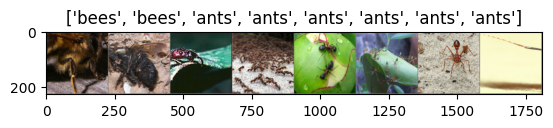

In [152]:
grid = torchvision.utils.make_grid(imgs) 
imageshow(grid, text=[classes[c] for c in labels])

Used the np.clip() method from numpy to ensure that the image pixel values are restricted between 0 and 1 to make the visualization clear. 

### 3. define the fine-tuning routine

In [165]:
def finetune_model(pretrained_model, loss_func, optim, epochs=10):
    start = time.time()

    model_weights = copy.deepcopy(pretrained_model.state_dict())
    accuracy = 0.0

    for e in range(epochs):
        print(f'Epoch number {e}/{epochs - 1}')
        print('=' * 20)

        # for each epoch we run through the training and validation set
        for dset in ['train', 'val']:
            if dset == 'train':
                pretrained_model.train()  # set model to train mode (i.e. trainbale weights)
            else:
                pretrained_model.eval()   # set model to validation mode

            loss = 0.0
            successes = 0

            # iterate over the (training/validation) data.
            for imgs, tgts in dloaders[dset]:
                imgs = imgs.to(dvc)
                tgts = tgts.to(dvc)
                optim.zero_grad()
                
                with torch.set_grad_enabled(dset == 'train'):
                    ops = pretrained_model(imgs)
                    _, preds = torch.max(ops, 1)
                    loss_curr = loss_func(ops, tgts)
                    # backward pass only if in training mode
                    if dset == 'train':
                        loss_curr.backward()
                        optim.step()

                loss += loss_curr.item() * imgs.size(0)
                successes += torch.sum(preds == tgts.data)

            loss_epoch = loss / dset_sizes[dset]
            accuracy_epoch = successes.double() / dset_sizes[dset]

            print(f'{dset} loss in this epoch: {loss_epoch}, accuracy in this epoch: {accuracy_epoch}')
            if dset == 'val' and accuracy_epoch > accuracy:
                accuracy = accuracy_epoch
                model_weights = copy.deepcopy(pretrained_model.state_dict())
        print()

    time_delta = time.time() - start
    print(f'Training finished in {time_delta // 60}mins {time_delta % 60}secs')
    print(f'Best validation set accuracy: {accuracy}')

    # load the best model version (weights)
    pretrained_model.load_state_dict(model_weights)
    return pretrained_model

### 4. define a function to visualize the model predictions:

In [156]:
def visualize_predictions(pretrained_model, max_num_imgs=4):
    torch.manual_seed(1)
    was_model_training = pretrained_model.training
    pretrained_model.eval()
    imgs_counter = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (imgs, tgts) in enumerate(dloaders['val']):
            imgs = imgs.to(dvc)
            tgts = tgts.to(dvc)
            ops = pretrained_model(imgs)
            _, preds = torch.max(ops, 1)
            
            for j in range(imgs.size()[0]):
                imgs_counter += 1
                ax = plt.subplot(max_num_imgs//2, 2, imgs_counter)
                ax.axis('off')
                ax.set_title(f'pred: {classes[preds[j]]} || target: {classes[tgts[j]]}')
                imageshow(imgs.cpu().data[j])

                if imgs_counter == max_num_imgs:
                    pretrained_model.train(mode=was_model_training)
                    return
        pretrained_model.train(mode=was_model_training)

### 5. use PyTorch’s torchvision.models sub-package to load the pretrained AlexNet model:

In [157]:
model_finetune = models.alexnet(pretrained = True)

c:\Users\jaroenchart\OneDrive - Chulalongkorn University\Desktop\book 2\Git\Named-Entity-Recognition\menv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jaroenchart\OneDrive - Chulalongkorn University\Desktop\book 2\Git\Named-Entity-Recognition\menv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\jaroenchart/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 37.5MB/s] 


This model object has the following two main components:

i. features: The feature extraction component, which contains all the convolutional and pooling layers

ii. classifier: The classifier block, which contains all the fully connected layers leading to the output layer

In [158]:
print(model_finetune.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [159]:
print(model_finetune.classifier)

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [160]:
print(model_finetune)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 6. The pretrained model has an output layer of size 1000, but we only have 2 classes in our fine-tuning dataset. So, we shall alter that

In [161]:
model_finetune.classifier[6] = nn.Linear(4096, len(classes))

### 7. We are all set to define the optimizer and loss function, and thereafter run the training routine as follows:

In [166]:
loss_func = nn.CrossEntropyLoss()

optim_finetune = optim.SGD(model_finetune.parameters(), lr=0.0001)

model_finetune = finetune_model(model_finetune, loss_func, optim_finetune, epochs=10)

Epoch number 0/9
train loss in this epoch: 0.5456787899869388, accuracy in this epoch: 0.7540983606557377
val loss in this epoch: 0.4596189638368445, accuracy in this epoch: 0.8169934640522876

Epoch number 1/9
train loss in this epoch: 0.49046578123921253, accuracy in this epoch: 0.7663934426229508
val loss in this epoch: 0.40648790989436356, accuracy in this epoch: 0.8562091503267973

Epoch number 2/9
train loss in this epoch: 0.4197229581778167, accuracy in this epoch: 0.8155737704918032
val loss in this epoch: 0.3761848465484731, accuracy in this epoch: 0.8627450980392157

Epoch number 3/9
train loss in this epoch: 0.3986247944050148, accuracy in this epoch: 0.8278688524590164
val loss in this epoch: 0.35708730984357445, accuracy in this epoch: 0.869281045751634

Epoch number 4/9
train loss in this epoch: 0.3741994805511881, accuracy in this epoch: 0.8360655737704918
val loss in this epoch: 0.34443429638357725, accuracy in this epoch: 0.8627450980392157

Epoch number 5/9
train loss

### 8. Visualize some of the model predictions 

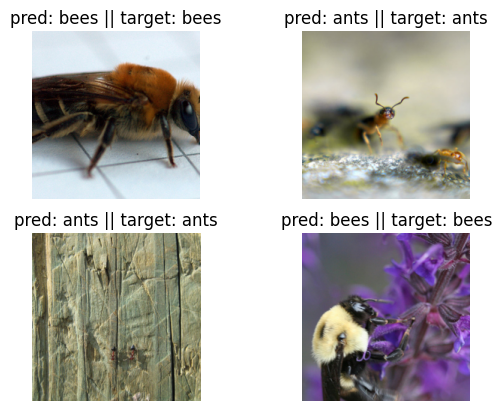

In [167]:
visualize_predictions(model_finetune)

Clearly, the pretrained AlexNet model has been able to transfer-learn on this rather tiny image classification dataset. This demonstrates both the power of transfer learning as well as the speed and ease with which we can fine-tune well-known models using PyTorch.

# Running a pretrained VGG model

    VGG = Visual Geometry Group of Oxford University
    VGG consists of 13 layers (10 convolutional layers and 3 fully connected layers) and 138 million parameters.

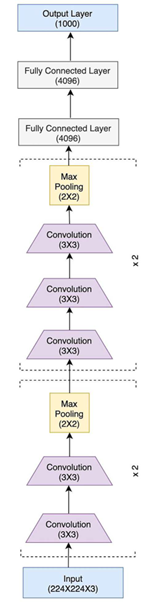

Other variants are VGG16 and VGG19, consisting of 16 and 19 layers, respectively. There is another set of variants – VGG13_bn, VGG16_ bn, and VGG19_bn, where bn suggests that these models also consist of batch-normalization layers.

    1. First, we need to import dependencies, including torchvision.models.
    2. Download the data and set up the ants and bees dataset and dataloader, along with the trans-formations.
    3. In order to make predictions on these images, we will need to download the 1,000 labels of the ImageNet dataset [8].
    4. Once downloaded, we need to create a mapping between the class indices 0 to 999 and the corresponding class labels, as shown here:

In [201]:
# Data normalization and augmentation transformations for train dataset
# Only normalization transformation for validation dataset

data_transformers = {
    'train': transforms.Compose([transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(), 
                                    transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230])]),
    'val': transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), 
                                      transforms.ToTensor(), 
                                      transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230])])}

img_data = {k: datasets.ImageFolder(os.path.join(ddir, k), data_transformers[k]) for k in ['train', 'val']}
dloaders = {k: torch.utils.data.DataLoader(img_data[k], batch_size=8, shuffle=True, num_workers=2) 
            for k in ['train', 'val']}
dset_sizes = {x: len(img_data[x]) for x in ['train', 'val']}
dvc = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [202]:
import ast
with open('./imagenet1000_clsidx_to_labels.txt') as f:
    classes_data = f.read()
classes_dict = ast.literal_eval(classes_data)
print({k: classes_dict[k] for k in list(classes_dict)[:5]})

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark'}


In [208]:
def imageshow(img, text=None):
    img = img.numpy().transpose((1, 2, 0))
    avg = np.array([0.490, 0.449, 0.411])
    stddev = np.array([0.231, 0.221, 0.230])
    img = stddev * img + avg
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if text is not None:
        plt.title(text)

def visualize_predictions(pretrained_model, max_num_imgs=4):
    torch.manual_seed(1)
    was_model_training = pretrained_model.training
    pretrained_model.eval()
    imgs_counter = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (imgs, tgts) in enumerate(dloaders['val']):
            imgs = imgs.to(dvc)
            ops = pretrained_model(imgs)
            _, preds = torch.max(ops, 1)
            print(preds)
            
            for j in range(imgs.size()[0]):
                imgs_counter += 1
                ax = plt.subplot(max_num_imgs//2, 2, imgs_counter)
                ax.axis('off')
                ax.set_title(f'pred: {classes_dict[int(preds[j])]}')
                imageshow(imgs.cpu().data[j])

                if imgs_counter == max_num_imgs:
                    pretrained_model.train(mode=was_model_training)
                    return
        pretrained_model.train(mode=was_model_training)

    5. Define the model prediction visualization function that takes in the pretrained model object and the number of images to run predictions on. This function should output the images with predictions.
    6. Load the pretrained VGG13 model:

In [204]:
model = models.vgg13(pretrained=True) 

    7. Finally, we run predictions on our ants and bees dataset using this pretrained model:

tensor([309, 310, 310, 309, 410, 310, 356, 310])


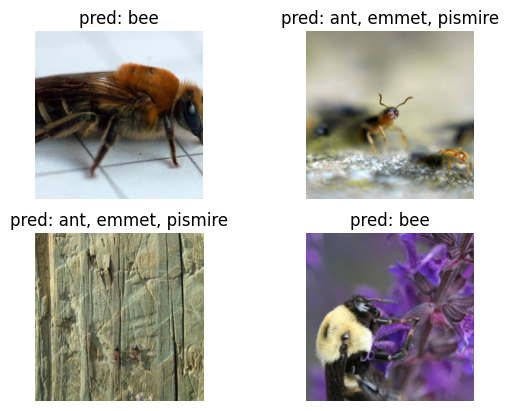

In [209]:
visualize_predictions(model)

# Exploring GoogLeNet(Inception v1) and Inception v3 

    GoogLeNet emerged as a radically different type of CNN architecture that is composed of a module of parallel convolutional layers called the inception module. GoogLeNet has 22 layers, the number of parameters in GoogLeNet is 5 million

• The inception module – a module of several parallel convolutional layers

• Using 1x1 convolutions to reduce the number of model parameters

• Global average pooling instead of a fully connected layer – reduces overfitting

• Using auxiliary classifiers for training – for regularization and gradient stability

## Inception modules

several convolutional layers running in parallel, which are finally concatenated to produce a single output vector.

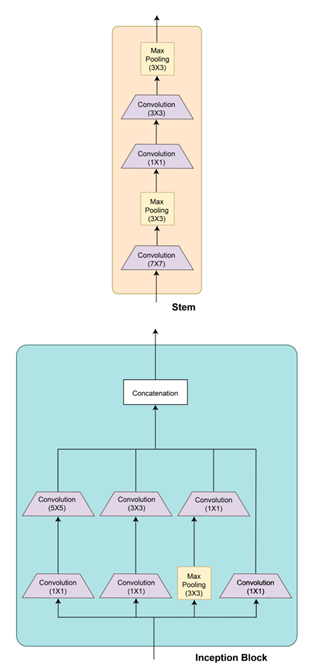

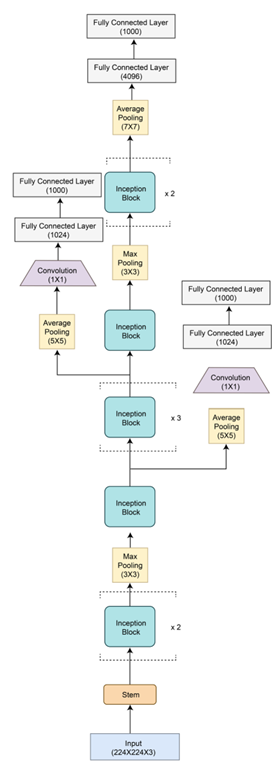

In [210]:
class InceptionModule(nn.Module):
    def __init__(self, input_planes, n_channels1x1, n_channels3x3red, 
                 n_channels3x3, n_channels5x5red, n_channels5x5, 
                 pooling_planes):
        super(InceptionModule, self).__init__() 
        # 1x1 convolution branch
        self.block1 = nn.Sequential(
            nn.Conv2d(input_planes, n_channels1x1, kernel_size=1), 
                      nn.BatchNorm2d(n_channels1x1),nn.ReLU(True),)
        # 1x1 convolution -> 3x3 convolution branch 
        self.block2 = nn.Sequential(
            nn.Conv2d(input_planes, n_channels3x3red, kernel_size=1), 
            nn.BatchNorm2d(n_channels3x3red),
            nn.ReLU(True), nn.Conv2d(n_channels3x3red, n_channels3x3, 
                                     kernel_size=3, padding=1),
                                     nn.BatchNorm2d(n_channels3x3),
                                     nn.ReLU(True),)
        # 1x1 conv -> 5x5 conv branch 
        self.block3 = nn.Sequential(
            nn.Conv2d(input_planes, n_channels5x5red, kernel_size=1), 
            nn.BatchNorm2d(n_channels5x5red),
            nn.ReLU(True), nn.Conv2d(n_channels5x5red, n_channels5x5,
                                     kernel_size=3, padding=1),
                                     nn.BatchNorm2d(n_channels5x5),
                                     nn.ReLU(True),
            nn.Conv2d(n_channels5x5, n_channels5x5, 
                      kernel_size=3, padding=1),
                      nn.BatchNorm2d(n_channels5x5),
                      nn.ReLU(True),)
        # 3x3 pool -> 1x1 conv branch 
        self.block4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1), 
            nn.Conv2d(input_planes, pooling_planes, kernel_size=1), 
            nn.BatchNorm2d(pooling_planes),
            nn.ReLU(True),)
    def forward(self, ip):
        op1 = self.block1(ip)
        op2 = self.block2(ip)
        op3 = self.block3(ip)
        op4 = self.block4(ip)
        return torch.cat([op1,op2,op3,op4], 1)

## 1x1 convolutions

## Global average pooling

## Auxiliary classifiers

    Once we have the inception module defined using PyTorch, we can easily instantiate the entire Inception v1 model as follows:

In [212]:
class GoogLeNet(nn.Module):
    def __init__(self):
        super(GoogLeNet, self).__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(3, 192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(True),
        )
 
        self.im1 = InceptionModule(192,  64,  96, 128, 16, 32, 32)
        self.im2 = InceptionModule(256, 128, 128, 192, 32, 96, 64)
 
        self.max_pool = nn.MaxPool2d(3, stride=2, padding=1)
 
        self.im3 = InceptionModule(480, 192,  96, 208, 16,  48,  64)
        self.im4 = InceptionModule(512, 160, 112, 224, 24,  64,  64)
        self.im5 = InceptionModule(512, 128, 128, 256, 24,  64,  64)
        self.im6 = InceptionModule(512, 112, 144, 288, 32,  64,  64)
        self.im7 = InceptionModule(528, 256, 160, 320, 32, 128, 128)
 
        self.im8 = InceptionModule(832, 256, 160, 320, 32, 128, 128)
        self.im9 = InceptionModule(832, 384, 192, 384, 48, 128, 128)
 
        self.average_pool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(4096, 1000)
 
    def forward(self, ip):
        op = self.stem(ip)
        out = self.im1(op)
        out = self.im2(op)
        op = self.maxpool(op)
        op = self.a4(op)
        op = self.b4(op)
        op = self.c4(op)
        op = self.d4(op)
        op = self.e4(op)
        op = self.max_pool(op)
        op = self.a5(op)
        op = self.b5(op)
        op = self.avgerage_pool(op)
        op = op.view(op.size(0), -1)
        op = self.fc(op)
        return op

    we can always load a pretrained GoogLeNet with just two lines of code:

In [213]:
import torchvision.models as models
model = models.googlenet(pretrained=True)

c:\Users\jaroenchart\OneDrive - Chulalongkorn University\Desktop\book 2\Git\Named-Entity-Recognition\menv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jaroenchart\OneDrive - Chulalongkorn University\Desktop\book 2\Git\Named-Entity-Recognition\menv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\jaroenchart/.cache\torch\hub\checkpoints\googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 41.9MB/s]


## Inception v3

This successor of Inception v1 has a total of 24 million parameters as compared to 5 million in v1. Besides the addition of several more layers, this model introduced different kinds of inception modules, which are stacked sequentially. 

Once again, besides building the model manually, we can use the pretrained model from 
PyTorch’s repository as follows:

In [214]:
import torchvision.models as models
model = models.inception_v3(pretrained=True)

c:\Users\jaroenchart\OneDrive - Chulalongkorn University\Desktop\book 2\Git\Named-Entity-Recognition\menv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\jaroenchart/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:02<00:00, 46.5MB/s] 


# ResNet and DenseNet architectures

## ResNet
    ResNet introduced the concept of skip connections. This simple yet effective trick overcomes the problem of both parameter overflow and vanishing gradients.

    Each block of such computation is called a residual block, hence the name of the model – residual network or ResNet:

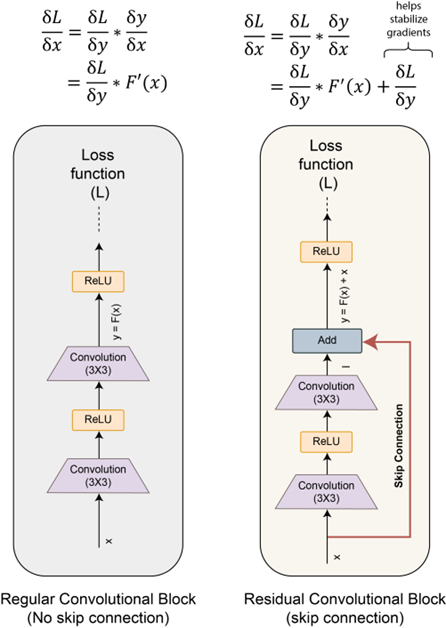

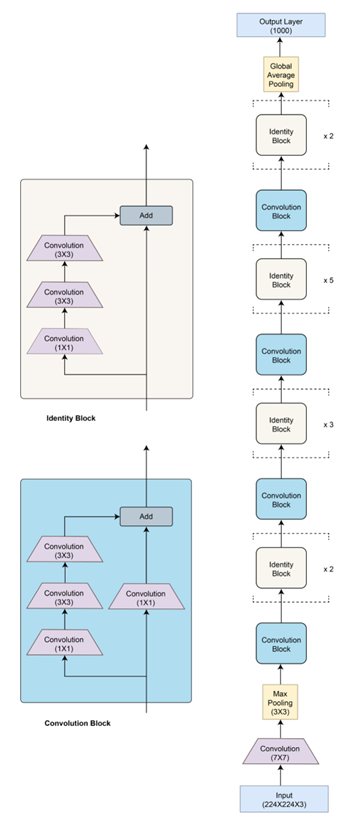

    There are two kinds of residual blocks – convolutional and identity

A residual block for ResNet can be implemented in PyTorch as shown here:

In [215]:
class BasicBlock(nn.Module):
    multiplier=1
    def __init__(self, input_num_planes, num_planes, strd=1):
        super(BasicBlock, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=input_num_planes, 
                                     out_channels=num_planes, 
                                     kernel_size=3, 
                                     stride=stride, padding=1, 
                                     bias=False)
        self.batch_norm1 = nn.BatchNorm2d(num_planes) 
        self.conv_layer2 = nn.Conv2d(in_channels=num_planes, 
                                     out_channels=num_planes, 
                                     kernel_size=3, stride=1, 
                                     padding=1, bias=False)
        self.batch_norm2 = nn.BatchNorm2d(num_planes) 
        self.res_connnection = nn.Sequential()
        if strd > 1 or input_num_planes != self.multiplier*num_planes:
            self.res_connnection = nn.Sequential( 
                nn.Conv2d(in_channels=input_num_planes, 
                          out_channels=self.multiplier*num_planes, 
                          kernel_size=1, stride=strd, bias=False),
                nn.BatchNorm2d(self.multiplier*num_planes))
    def forward(self, inp):
        op = F.relu(self.batch_norm1(self.conv_layer1(inp)))
        op = self.batch_norm2(self.conv_layer2(op)) 
        op += self.res_connnection(inp)
        op = F.relu(op)
        return op

Again we can always use the pretrained ResNet model from PyTorch’s repository:

In [ ]:
import torchvision.models as models 
model = models.resnet50(pretrained=True)

## DenseNet

DenseNet, or dense networks, introduced the idea of connecting every convolutional layer with every other layer within what is called a dense block. And every dense block is connected to every other dense block in the overall DenseNet. A dense block is simply a module of two 3x3 densely connected convolutional layers.

    Counterintuitively, the number of parameters of such a network setting will also be low. As every layer receives the feature maps from all the previous layers, the required number of channels (depth) can be fewer.
This might raise a question about the exploding size of outputs as we proceed further in the network. To combat this compounding effect, a special type of block called the transition block is devised for this network. Composed of a 1x1 convolutional layer followed by a 2x2 pooling layer

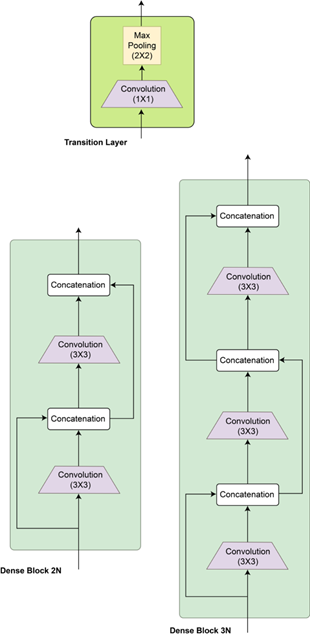

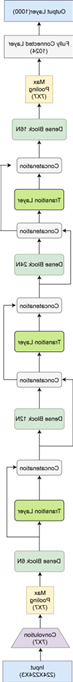

In [216]:
class DenseBlock(nn.Module):
    def __init__(self, input_num_planes, rate_inc):
        super(DenseBlock, self).__init__()
        self.batch_norm1 = nn.BatchNorm2d(input_num_planes) 
        self.conv_layer1 = nn.Conv2d(in_channels=input_num_planes, 
                                     out_channels=4*rate_inc, 
                                     kernel_size=1, bias=False)
        self.batch_norm2 = nn.BatchNorm2d(4*rate_inc) 
        self.conv_layer2 = nn.Conv2d(in_channels=4*rate_inc, 
                                     out_channels=rate_inc, 
                                     kernel_size=3, padding=1, 
                                     bias=False)
    def forward(self, inp):
        op = self.conv_layer1(F.relu(self.batch_norm1(inp)))
        op = self.conv_layer2(F.relu(self.batch_norm2(op))) 
        op = torch.cat([op,inp], 1)
        return op
class TransBlock(nn.Module):
    def __init__(self, input_num_planes, output_num_planes):
        super(TransBlock, self).__init__()
        self.batch_norm = nn.BatchNorm2d(input_num_planes) 
        self.conv_layer = nn.Conv2d(in_channels=input_num_planes, 
                                    out_channels=output_num_planes, 
                                    kernel_size=1, bias=False)
    def forward(self, inp):
        op = self.conv_layer(F.relu(self.batch_norm(inp)))
        op = F.avg_pool2d(op, 2)
        return op

    PyTorch provides pretrained models for all of these variants:

In [ ]:
import torchvision.models as models
densenet121 = models.densenet121(pretrained=True) 
densenet161 = models.densenet161(pretrained=True) 
densenet169 = models.densenet169(pretrained=True) 
densenet201 = models.densenet201(pretrained=True)

DenseNet outperforms all the models discussed so far on the ImageNet dataset. Various hybrid models have been developed by mixing and matching the ideas presented in the previous sections. The Inception-ResNet and ResNeXt models are examples of such hybrid networks. The following diagram shows the ResNeXt architecture:

# EfficientNets 
    one of the best-performing CNN architectures till date 

the expansion or scaling of the CNN model through one of the following:

• An increase in the number of layers

• An increase in the number of feature maps or channels in a convolutional layer

• An increase in the spatial dimension going from 32x32 pixel images in LeNet to 224x224 pixel 
images in AlexNet and so on

    depth, width, and resolution,

    Instead of manually scaling these attributes, which often leads to suboptimal results, EfficientNets use neural architecture search to calculate the optimal scaling factors for each of them.